In [1]:
import HARK.ConsumptionSaving.ConsPortfolioModel as cpm
from HARK.Calibration.Income.IncomeTools import (
     sabelhaus_song_var_profile,
)
from sharkfin.expectations import *
from sharkfin.population import *
from sharkfin.markets import *
from sharkfin.simulation import *
import logging
import math
from math import exp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def run_simulation(
    agent_parameters,
    dist_params,
    n_per_class,
    a=None,
    q=None,
    r= None,
    fm=None,
    market=None,
    dphm=1500,
    days_per_quarter=None
):
    #initialize population
    pop = AgentPopulation(agent_parameters, dist_params, n_per_class)
    
    market = MockMarket()
    
    #initialize the financial Fodel
    Fm = FinanceModel
    
    #initialize population model
    pop.init_simulation()
    
    attsim = AttentionSimulation(
        pop, Fm, a=a, q=q, r=r, market=market, dphm=dphm, days_per_quarter = days_per_quarter
    )
    attsim.simulate()
    
    return attsim, attsim.sim_stats()

In [3]:
dist_params = {
    'CRRA' : {'bot' : 2, 'top' : 10, 'n' : 2}, # Chosen for "interesting" results
    'DiscFac' : {'bot' : 0.936, 'top' : 0.978, 'n' : 2} # from CSTW "MPC" results
}

ssvp = sabelhaus_song_var_profile()

#assume all agents are 27
idx_40 = ssvp['Age'].index(40)

#parameters shared by all agents
agent_parameters = {
    'aNrmInitStd' : 0.0,
    'LivPrb' : [0.98 ** 0.25],
    'PermGroFac': [1.01 ** 0.25],
    'pLvlInitMean' : 1.0, # initial distribution of permanent income
    'pLvlInitStd' : 0.0,
    'Rfree' : 1.0,
    'TranShkStd' : [ssvp['TranShkStd'][idx_40] / 2],  # Adjust non-multiplicative shock to quarterly
    'PermShkStd' : [ssvp['PermShkStd'][idx_40] ** 0.25]
}

In [4]:
sim, sim_stats = run_simulation(
    agent_parameters,
    dist_params,
    10,
    a=0.2,
    q=8,
    #r = 10,
    days_per_quarter = 30,
    dphm=10500
)

/home/sb/.local/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/sb/.local/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/sb/.local/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Q-0
run_market, buy_sell: (0, 0)
price: 99.87160229559392
run_market, buy_sell: (570, 38)
price: 97.37978888048121
run_market, buy_sell: (11, 0)
price: 95.80254265653616
run_market, buy_sell: (370, 0)
price: 95.79522665530769
run_market, buy_sell: (2, 72)
price: 95.58254321813959
run_market, buy_sell: (2, 0)
price: 95.49917573128589
run_market, buy_sell: (2, 0)
price: 95.73866935600817
run_market, buy_sell: (3, 23)
price: 96.87702706796574
run_market, buy_sell: (5, 0)
price: 97.03898435832018
run_market, buy_sell: (248, 0)
price: 93.8150432922633
run_market, buy_sell: (624, 7)
price: 92.50557818106027
run_market, buy_sell: (826, 0)
price: 91.50237028038204
run_market, buy_sell: (1400, 0)
price: 92.37512507175049
run_market, buy_sell: (0, 0)
price: 92.98912622690601
run_market, buy_sell: (9, 51)
price: 93.47615921959871
run_market, buy_sell: (1, 2)
price: 93.63266594738113
run_market, buy_sell: (0, 5)
price: 94.33245995080557
run_market, buy_sell: (460, 14)
price: 95.49136361488392
run_

run_market, buy_sell: (0, 13)
price: 104.27396573554515
run_market, buy_sell: (26, 5)
price: 102.78370435645746
run_market, buy_sell: (6, 288)
price: 102.25198978030197
run_market, buy_sell: (528, 376)
price: 102.61257113527387
Q-5
run_market, buy_sell: (3147, 475)
price: 100.45817608020327
run_market, buy_sell: (8, 320)
price: 98.7755485331912
run_market, buy_sell: (356, 0)
price: 99.59014564235954
run_market, buy_sell: (754, 0)
price: 98.34450615951337
run_market, buy_sell: (71, 240)
price: 99.58555514385264
run_market, buy_sell: (245, 8)
price: 99.37145542587378
run_market, buy_sell: (0, 0)
price: 100.73652602933716
run_market, buy_sell: (171, 880)
price: 101.29331887418836
run_market, buy_sell: (0, 65)
price: 102.22480429670124
run_market, buy_sell: (0, 25)
price: 103.36904318594529
run_market, buy_sell: (126, 1266)
price: 102.68509060568307
run_market, buy_sell: (0, 991)
price: 102.83929611076346
run_market, buy_sell: (0, 0)
price: 101.59348788265545
run_market, buy_sell: (1530, 0

In [5]:
data = sim.data()

In [6]:
data

,t,prices,buy,sell,buy_macro,sell_macro,owned,total_assets,mean_income,total_consumption,permshock_std,ror,expected_ror,expected_std
0,0,99.871602,0,0,0,0,5257.931037,528412.494121,28467.203782,112191.945914,0.262479,-0.000452,0.000587,0.011762
1,1,97.379789,570,38,0,38,5828.905346,514360.964229,28467.203782,0.000000,0.262479,-0.024138,-0.000360,0.012441
2,2,95.802543,11,0,0,0,5840.132687,505615.886635,28467.203782,0.000000,0.262479,-0.015377,-0.000929,0.012479
3,3,95.795227,370,0,0,0,6137.905304,499083.157894,27740.775409,35004.592315,0.327570,0.000757,-0.000835,0.012234
4,4,95.582543,2,72,0,72,6140.359917,498266.297722,27740.775409,0.000000,0.327570,-0.001389,-0.000833,0.011981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,235,110.147515,0,5,0,0,8590.105284,637876.579459,27290.596039,0.000000,0.611986,0.026796,0.005793,0.012027
236,236,109.977724,1277,6,0,0,9861.647698,637105.960475,27290.596039,0.000000,0.611986,-0.000709,0.005312,0.011698
237,237,109.865317,3295,23,0,0,13065.767519,643165.888266,27966.936847,41513.825714,0.665378,-0.000190,0.004906,0.011349
238,238,109.572712,304,73,0,67,13204.870971,637856.853100,28256.063089,27907.487153,0.693675,-0.001832,0.004408,0.011063


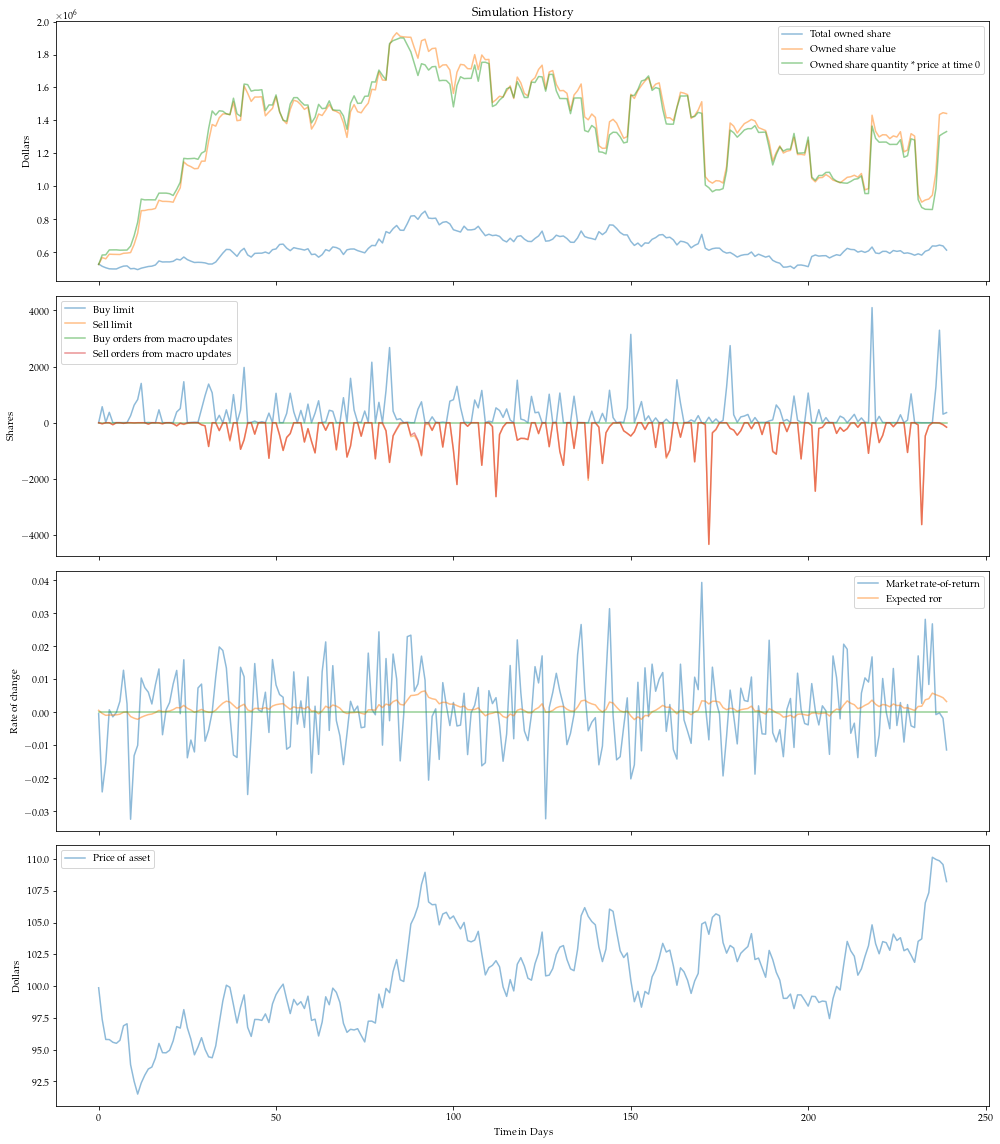

In [7]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})


fig, ax = plt.subplots(4,
    sharex='col',
    figsize=(14,16),
)

ax[0].plot(data['total_assets'], alpha=0.5, label='Total owned share')
ax[0].plot([p * o for (p,o) in zip(data['prices'], data['owned'])], alpha=0.5, label='Owned share value')
ax[0].plot([100 * o for (p,o) in zip(data['prices'], data['owned'])], alpha=0.5, label='Owned share quantity * price at time 0')
ax[0].legend()

ax[1].plot(data['buy'], alpha=0.5, label='Buy limit')
ax[1].plot(-data['sell'], alpha=0.5, label='Sell limit')
ax[1].plot(data['buy_macro'], alpha=0.5, label='Buy orders from macro updates')
ax[1].plot(-data['sell_macro'], alpha=0.5, label='Sell orders from macro updates')
ax[1].legend()

ax[2].plot(data['ror'], alpha=0.5, label='Market rate-of-return')
ax[2].plot(data['expected_ror'], alpha=0.5, label='Expected ror')
ax[2].plot(np.zeros(data['expected_ror'].shape), alpha=0.5)
ax[2].legend()

ax[3].plot(data['prices'], alpha=0.5, label='Price of asset')
ax[3].legend()

ax[0].set_title("Simulation History")
ax[0].set_ylabel("Dollars")
ax[1].set_ylabel("Shares")
ax[2].set_ylabel("Rate of change")
ax[3].set_ylabel("Dollars")
ax[3].set_xlabel("Time in Days")

plt.tight_layout()
plt.savefig("asset_bubble_run.png")
plt.show()



In [8]:
sim.days_per_quarter

30

In [9]:
sim.market.prices

[100,
 99.87160229559392,
 97.37978888048121,
 95.80254265653616,
 95.79522665530769,
 95.58254321813959,
 95.49917573128589,
 95.73866935600817,
 96.87702706796574,
 97.03898435832018,
 93.8150432922633,
 92.50557818106027,
 91.50237028038204,
 92.37512507175049,
 92.98912622690601,
 93.47615921959871,
 93.63266594738113,
 94.33245995080557,
 95.49136361488392,
 94.76234350651983,
 94.75052002422804,
 94.9532409414138,
 95.6859105148853,
 96.81865294879032,
 96.69540209127796,
 98.151820332098,
 96.71731882826819,
 95.82353938707921,
 94.59272226067829,
 95.2094568115934,
 95.94262138211357,
 95.02255797025096,
 94.43486056447335,
 94.36127647418192,
 95.29269354178119,
 97.09735195975703,
 98.83172838770795,
 100.07364932698742,
 99.90278975385999,
 98.52636717608944,
 97.09571901791134,
 98.33732308790549,
 99.31205308404678,
 96.75603450988591,
 96.04267550668203,
 97.37929511308492,
 97.37079106542417,
 97.3049100676086,
 97.81429434301995,
 97.13477203083143,
 98.60392378413273,


In [10]:
sim.market.dividends

[0,
 0.08322633524632826,
 0.08114982406706768,
 0.07983545221378013,
 0.07982935554608973,
 0.07965211934844967,
 0.07958264644273824,
 0.07978222446334014,
 0.08073085588997145,
 0.08086582029860015,
 0.07817920274355275,
 0.07708798181755022,
 0.0762519752336517,
 0.07697927089312541,
 0.07749093852242167,
 0.07789679934966559,
 0.07802722162281761,
 0.07861038329233798,
 0.0795761363457366,
 0.07896861958876653,
 0.0789587666868567,
 0.07912770078451149,
 0.07973825876240441,
 0.0806822107906586,
 0.08057950174273162,
 0.08179318361008167,
 0.08059776569022349,
 0.07985294948923267,
 0.07882726855056524,
 0.07934121400966117,
 0.07995218448509464,
 0.07918546497520913,
 0.07869571713706112,
 0.07863439706181827,
 0.07941057795148433,
 0.0809144599664642,
 0.0823597736564233,
 0.08339470777248952,
 0.08325232479488333,
 0.08210530598007452,
 0.08091309918159278,
 0.08194776923992124,
 0.08276004423670565,
 0.08063002875823826,
 0.08003556292223503,
 0.08114941259423744,
 0.081142325